In [1]:
from hapiclient import hapi, hapitime2datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

In [2]:
def fetch_omni_1min_data(params,data, start, stop):
    server      = 'https://cdaweb.gsfc.nasa.gov/hapi'
    dataset     = data
    parameters  = params
    data, meta  = hapi(server, dataset, parameters, start, stop)

    return data

In [3]:
def extract_data(data, params):

    header = params.split(',')
    header.insert(0, 'Timestamp')

    #extract the data from the list
    extracted_data = [[x[i] for x in data] for i in range(len(header))]

    #create a dictionary and convert to dataframe using param names as headers
    df_dict = {header: values for header, values in zip(header, extracted_data)}
    df = pd.DataFrame(df_dict).set_index('Timestamp')

    #convert to datetime from '\b' time
    df.index = hapitime2datetime(df.index.values.astype(str))
    df.index = df.index.tz_convert("UTC").tz_convert(None)


    return df

In [4]:
def extract_omni_1min(data, params):

    df = extract_data(data, params)
    df['Timestamp_1min_omni'] = df.index
    df['Timestamp_1hr_omni'] = pd.to_datetime(df['Timestamp_1min_omni'], errors='coerce').dt.floor('1h')
    df = df.reset_index(drop=True)
    
    return df


In [11]:
omni_1min = "OMNI_HRO_5MIN"
omni_1min_params = 'percent_interp,BY_GSE,BZ_GSE,flow_speed,proton_density,T,Pressure,E,Mach_num,BSN_x,BSN_y,BSN_z'

#Pressure = flow pressure in nPa

yr = 2021
months = []
years = [2021,2022]
for year in years:
    for month in range(1,13):

        print('Processing: ',year, month)

        _, num_days = calendar.monthrange(year, month)

        start_time = f'{year}-{month:02d}-{1:02d}T00:00:000Z'
        end_time = f'{year}-{month:02d}-{num_days:02d}T23:59:59Z'

        #download the data then clean it
        omni_1min_data = fetch_omni_1min_data(omni_1min_params, omni_1min, start_time, end_time)
        omni_1min_df = extract_omni_1min(omni_1min_data, omni_1min_params)

        months.append(omni_1min_df)
        
months_df = pd.concat(months)
months_df = months_df.reset_index(drop=True)

export_path = f'/Users/sr2/OneDrive - University College London/PhD/Experiences/Postdocs/JSPS/Research/Analysis/Apr-24/data/omni/'
df_name = f'omni_hro_5min_2021-2022'
export_filename = export_path + df_name +'.csv'
months_df.to_csv(export_filename, index=False, header=True)
months_df
        

Processing:  2021 1


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2021 2


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2021 3


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2021 4


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2021 5


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2021 6


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2021 7


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2021 8


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2021 9


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2021 10


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2021 11


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2021 12


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2022 1


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2022 2


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2022 3


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2022 4


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2022 5


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2022 6


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2022 7


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2022 8


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2022 9


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2022 10


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2022 11


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


Processing:  2022 12


/Users/sr2/opt/anaconda3/envs/nipr_env/lib/python3.12/site-packages/hapiclient/hapitime.py:287: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Time = pandas.to_datetime(Time, infer_datetime_format=True).tz_convert(tzinfo).to_pydatetime()


,percent_interp,BY_GSE,BZ_GSE,flow_speed,proton_density,T,Pressure,E,Mach_num,BSN_x,BSN_y,BSN_z,Timestamp_1min_omni,Timestamp_1hr_omni
0,0,0.58,0.93,358.899994,4.51,34062.0,1.16,-0.39,13.4,14.38,-1.67,0.51,2021-01-01 00:00:00,2021-01-01 00:00:00
1,0,0.44,1.21,358.399994,4.22,34142.0,1.08,-0.46,12.3,14.50,-1.58,0.43,2021-01-01 00:05:00,2021-01-01 00:00:00
2,0,0.04,1.46,359.100006,4.41,33812.0,1.14,-0.51,12.5,14.43,-1.60,0.46,2021-01-01 00:10:00,2021-01-01 00:00:00
3,38,-0.52,1.43,359.899994,4.29,31964.0,1.11,-0.45,12.2,14.46,-1.48,0.39,2021-01-01 00:15:00,2021-01-01 00:00:00
4,92,-1.11,1.67,360.600006,4.36,28132.0,1.13,-0.51,12.5,14.45,-1.47,0.47,2021-01-01 00:20:00,2021-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,100,3.28,-0.87,572.799988,2.04,69130.0,1.34,0.01,7.3,13.50,-0.68,0.25,2022-12-31 23:35:00,2022-12-31 23:00:00
210236,100,3.04,-1.88,583.200012,2.54,92632.0,1.73,0.62,8.2,13.53,-0.52,-0.02,2022-12-31 23:40:00,2022-12-31 23:00:00
210237,100,2.70,-1.44,565.599976,2.31,66356.0,1.48,0.25,7.7,13.51,-0.72,-0.02,2022-12-31 23:45:00,2022-12-31 23:00:00
210238,100,2.35,0.47,572.099976,2.38,81531.0,1.55,-0.61,8.0,13.55,-0.78,0.31,2022-12-31 23:50:00,2022-12-31 23:00:00


In [12]:
months_df = months_df[months_df['Mach_num']< 100]
months_df['sw_cat'] = np.where(months_df['flow_speed'] < 400, 'slow', 'fast')
#months_df = months_df[months_df['']< 100]
months_df

/var/folders/n2/t9qn3_vj3nd6jb505jq_l8dw0000gn/T/ipykernel_44137/1718605959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  months_df['sw_cat'] = np.where(months_df['flow_speed'] < 400, 'slow', 'fast')


,percent_interp,BY_GSE,BZ_GSE,flow_speed,proton_density,T,Pressure,E,Mach_num,BSN_x,BSN_y,BSN_z,Timestamp_1min_omni,Timestamp_1hr_omni,sw_cat
0,0,0.58,0.93,358.899994,4.51,34062.0,1.16,-0.39,13.4,14.38,-1.67,0.51,2021-01-01 00:00:00,2021-01-01 00:00:00,slow
1,0,0.44,1.21,358.399994,4.22,34142.0,1.08,-0.46,12.3,14.50,-1.58,0.43,2021-01-01 00:05:00,2021-01-01 00:00:00,slow
2,0,0.04,1.46,359.100006,4.41,33812.0,1.14,-0.51,12.5,14.43,-1.60,0.46,2021-01-01 00:10:00,2021-01-01 00:00:00,slow
3,38,-0.52,1.43,359.899994,4.29,31964.0,1.11,-0.45,12.2,14.46,-1.48,0.39,2021-01-01 00:15:00,2021-01-01 00:00:00,slow
4,92,-1.11,1.67,360.600006,4.36,28132.0,1.13,-0.51,12.5,14.45,-1.47,0.47,2021-01-01 00:20:00,2021-01-01 00:00:00,slow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,100,3.28,-0.87,572.799988,2.04,69130.0,1.34,0.01,7.3,13.50,-0.68,0.25,2022-12-31 23:35:00,2022-12-31 23:00:00,fast
210236,100,3.04,-1.88,583.200012,2.54,92632.0,1.73,0.62,8.2,13.53,-0.52,-0.02,2022-12-31 23:40:00,2022-12-31 23:00:00,fast
210237,100,2.70,-1.44,565.599976,2.31,66356.0,1.48,0.25,7.7,13.51,-0.72,-0.02,2022-12-31 23:45:00,2022-12-31 23:00:00,fast
210238,100,2.35,0.47,572.099976,2.38,81531.0,1.55,-0.61,8.0,13.55,-0.78,0.31,2022-12-31 23:50:00,2022-12-31 23:00:00,fast


<Axes: xlabel='Pressure', ylabel='Count'>

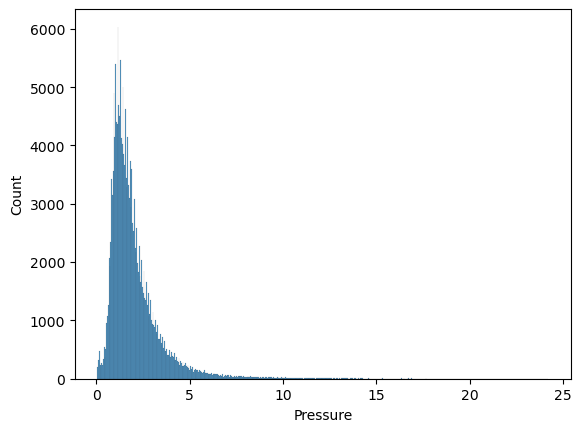

In [13]:
sns.histplot(months_df['Pressure'])

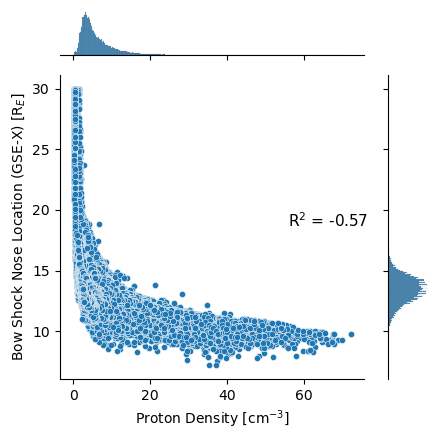

In [14]:
y = months_df['BSN_x']
x = months_df['proton_density']
r2 = x.corr(y)
sns.jointplot(x=x, y=y, kind='scatter', s=20, height=4.5)
RE = r'R$_E$'
pcc = r'cm$^{-3}$'
plt.xlabel(f'Proton Density [{pcc}]')
plt.ylabel(f'Bow Shock Nose Location (GSE-X) [{RE}]')
#plt.xlabel('Pressure [nPa]')

#plt.ylabel('Electric Field [mV/m]')
#plt.xlabel('Bz [nT]')

r2_lab = r'R$^2$'    
annotation = f'{r2_lab} = {r2:.2f}'
plt.annotate(annotation, xy=(0.75, 0.5), xycoords='axes fraction', fontsize=11)
plt.tight_layout()
#plt.savefig('/Users/sr2/OneDrive - University College London/PhD/Experiences/Postdocs/JSPS/Research/Analysis/Apr-24/plots/omni/R2_Np_BSN.png', dpi=300)

<Axes: xlabel='BSN_x', ylabel='Count'>

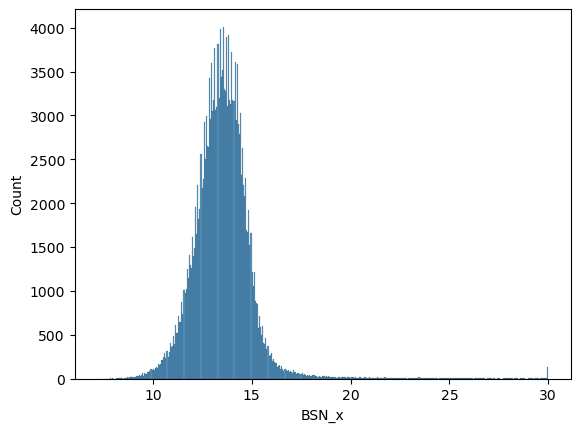

In [15]:
sns.histplot(months_df['BSN_x'])

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(months_df.corr(), annot=True, fmt=".2f", vmin=-1, vmax=1, cmap='coolwarm')

ValueError: could not convert string to float: 'slow'

<Figure size 1000x1000 with 0 Axes>

In [ ]:
#sns.jointplot(data=months_df, x='BSN_z', y='Pressure', kind='scatter')